### Question 1

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

### Create a csv file with the given data

In [385]:
data = {
    'salary': [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2],
    'experience': [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
}

df = pd.DataFrame(data)

csv_file = 'salary.csv'
df.to_csv(csv_file, index=False)
df

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4
5,4.2,2.5
6,4.4,2.8
7,6.1,3.1
8,5.4,3.3
9,5.7,3.7


In [386]:
X=df['experience'].values
Y=df['salary'].values

### Function for calculating MSE

In [387]:
def calc_errors(y_pred,y):
    mse=np.sum((y-y_pred)**2)/len(y)
    return mse

### Error change wrt slopes

In [388]:
slopes=[0.1,0.8,1.5]
b=1.1
errors=[]

for beta in slopes:
    y_pred=[beta*x + b for x in X]
    error=calc_errors(y_pred,Y)
    errors.append(error)
    
errors

[10.81115, 1.762599999999999, 1.1404166666666662]

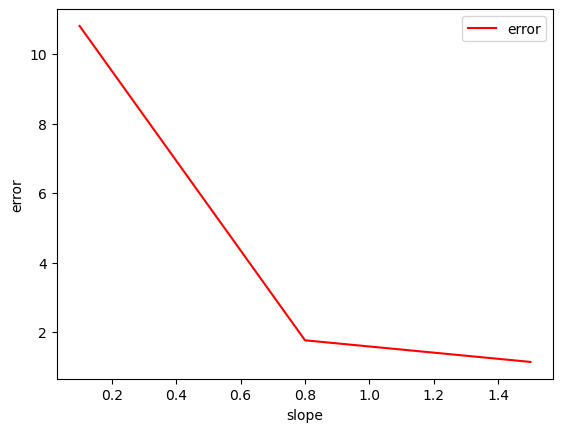

In [389]:
plt.plot(slopes,errors,color='red',label= 'error')
plt.xlabel('slope')
plt.ylabel('error')
plt.legend()

In [390]:
beta=0
b=1.1
errors=[]
slopes=[]

while beta<=1.5:
    y_pred=[beta*x + b for x in X]
    error=calc_errors(y_pred,Y)
    errors.append(error)
    slopes.append(beta)
    beta+=0.01
    


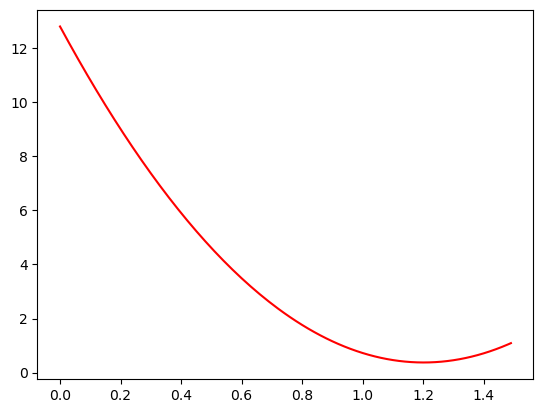

In [391]:
plt.plot(slopes,errors,color='red')

### Slope for which error is minimum

In [392]:
errors.index(min(errors))

120

In [393]:
slopes[120]

1.2000000000000008

### Error change wrt intercept

In [394]:
beta=1.2
b=0
errors=[]
intercepts=[]

In [395]:
while b<=1.5:
    y_pred=[beta*x + b for x in X]
    error=calc_errors(y_pred,Y)
    errors.append(error)
    intercepts.append(b)
    b+=0.01

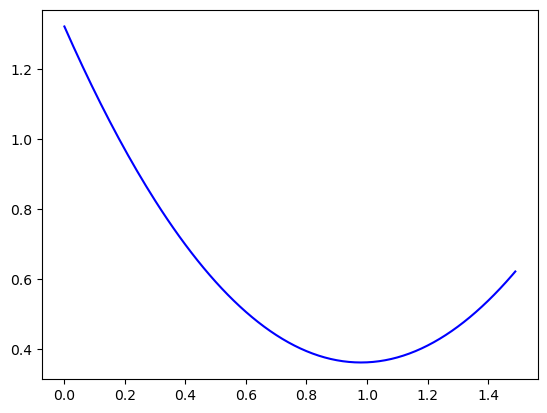

In [396]:
plt.plot(intercepts,errors,color='blue')

### Intercept for which error is minimum

In [397]:
errors.index(min(errors))

98

In [398]:
intercepts[98]

0.9800000000000006

### Values generated by Sckit-Learn

In [399]:
model = LinearRegression()
model.fit(np.array(X).reshape(-1,1),Y)
y_pred = model.predict(np.array(X).reshape(-1,1))
mse = mean_squared_error(Y, y_pred)
print(mse,model.coef_[0],model.intercept_)

0.23366710810280558 1.567098293113596 -0.035638610947616556


### Question 2

### Changing values to logistic

In [400]:
df['salary'] = df['salary'].apply(lambda x: 1 if x > 4 else 0)
df

,salary,experience
0,0,1.2
1,0,1.5
2,0,1.9
3,0,2.2
4,0,2.4
5,1,2.5
6,1,2.8
7,1,3.1
8,1,3.3
9,1,3.7


In [401]:
X=df['experience'].values
Y=df['salary'].values
losses=[]

### Logistic Regression

In [402]:
def logistic_regression(X,Y,epochs,alpha,b1,b0):
    for _ in range(epochs):
        for x,y in zip(X,Y):
            z=b1*x + b0
            y_pred=1/(1+np.exp(-z))
            error=y_pred-y
            b1-=(alpha*error*x)
            b0-=(alpha*error)
        losses.append(calc_loss(y_pred,y))
    
    return b1,b0

In [403]:
def calc_loss(y_pred,y):
    return -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

In [404]:
b1,b0 = logistic_regression(X,Y,300,0.01,0,0)
y_probs=[1/(1+np.exp(-(b1*x+b0))) for x in X]
y_binary = [1 if prob > 0.5 else 0 for prob in y_probs]

print(y_binary)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


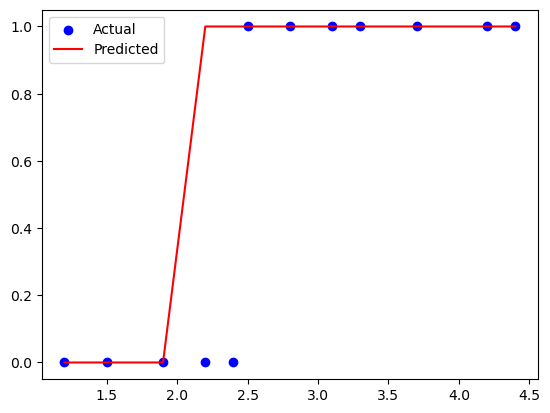

In [405]:
plt.scatter(X,Y,color='blue',label='Actual')
plt.plot(X,y_binary,color='red',label='Predicted')
plt.legend()
plt.show()

### Logloss plot

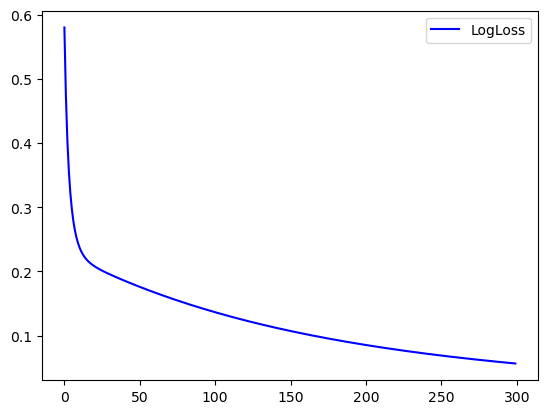

In [406]:
plt.plot(list(range(len(losses))),losses,color='blue',label='LogLoss')
plt.legend()

### Predicted value using Sckit-Learn

In [407]:
model = LogisticRegression()
model.fit(X.reshape(-1,1),Y)
y_pred = model.predict(X.reshape(-1,1))
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [359]:
log_loss_1=[]
log_loss_0=[]
log_loss=[]
for prob in y_probs:
    if prob>0.5:
        log_loss_1.append(-np.log(prob))
        log_loss.append(-np.log(prob))
    else:
        log_loss_0.append(-np.log(1-prob))
        log_loss.append(-np.log(1-prob))

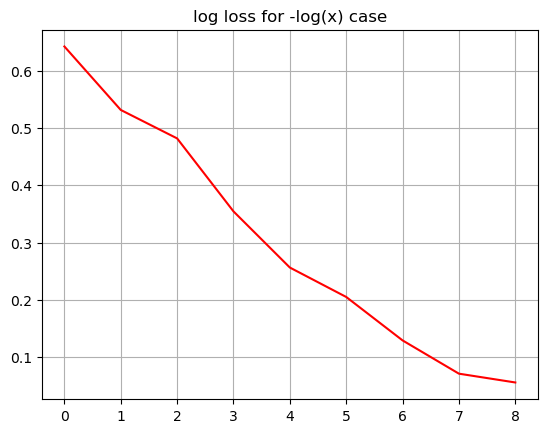

In [411]:
plt.figure()
plt.plot(list(range(len(log_loss_1))), log_loss_1, color='red')
plt.title('log loss for -log(x) case')
plt.grid(True)
plt.show()

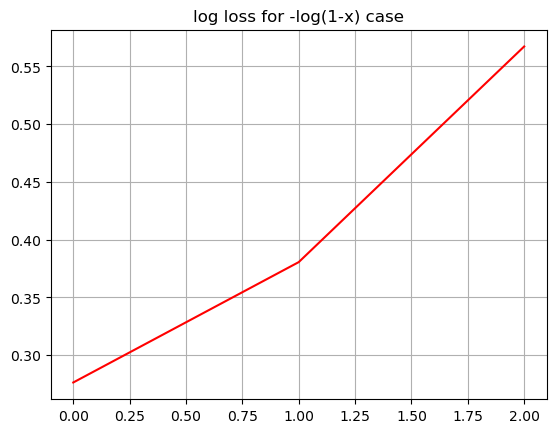

In [412]:
plt.figure()
plt.plot(list(range(len(log_loss_0))), log_loss_0, color='red')
plt.title('log loss for -log(1-x) case')
plt.grid(True)
plt.show()

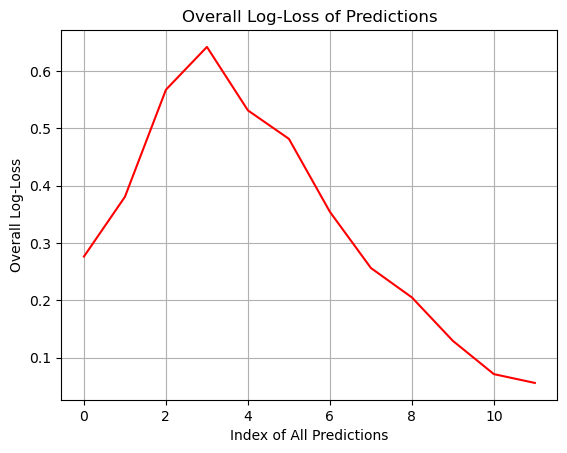

In [362]:
plt.figure()
plt.plot(list(range(len(log_loss))), log_loss, color='red')
plt.xlabel('Index of All Predictions')
plt.ylabel('Overall Log-Loss')
plt.title('Overall Log-Loss of Predictions')
plt.grid(True)
plt.show()

### Question 3

### For positive slope

In [417]:
X = np.array([1, 2, 4, 3, 5])
Y = np.array([1, 3, 3, 2, 5])
errors=[]

### Calculating Gradient descent

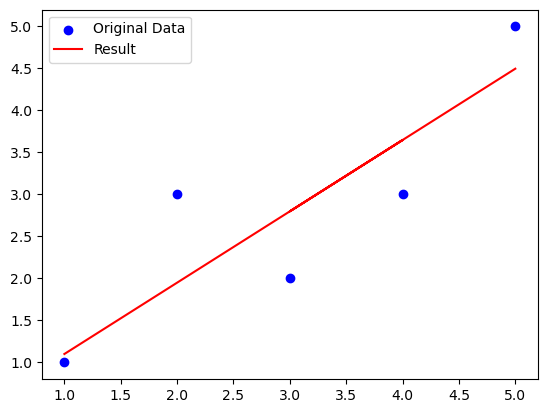

In [418]:
def gradient_descent(X, Y, epochs, alpha, b1, b0):
    for _ in range(epochs):  
        for x, y in zip(X, Y):
            y_pred = b1 * x + b0
            error = y_pred - y
            b1 -= alpha * error * x
            b0 -= alpha * error
            errors.append(abs(y_pred-y))
    return b1, b0
b1,b0 = gradient_descent(X,Y,9,0.01,0,0)
y_pred=[b1*x + b0 for x in X]

plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label=f'Result')
plt.legend()

### Change in error

45

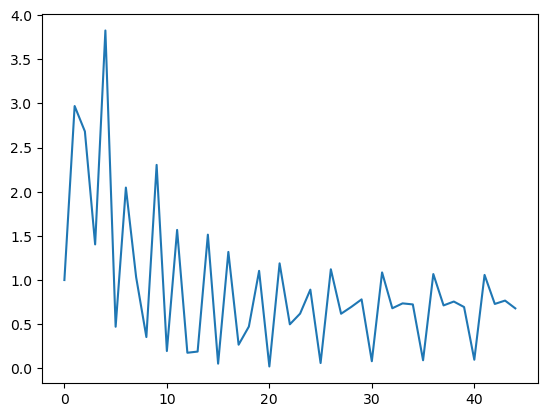

In [419]:
plt.plot(list(range(len(errors))),errors)
len(errors)

### For negative slope

In [378]:
X = np.array([1, 2, 3, 4, 5])
Y = np.array([10, 8, 6, 4, 2])
errors=[]

### Calculating Gradient descent

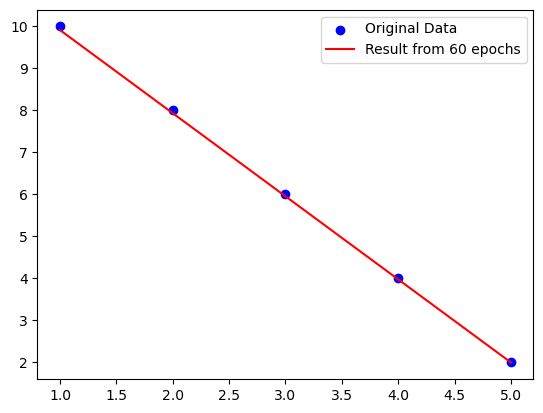

In [379]:
def gradient_descent(X, Y, epochs, alpha, b1, b0):
    for _ in range(epochs):  
        for x, y in zip(X, Y):
            y_pred = b1 * x + b0
            error = y_pred - y
            b1 -= alpha * error * x
            b0 -= alpha * error
            errors.append(abs(y_pred-y))
        
    
    return b1, b0
b1,b0 = gradient_descent(X,Y,100,0.05,0,0)
y_pred=[b1*x + b0 for x in X]

plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label=f'Result from 60 epochs')
plt.legend()

### Change in error

500

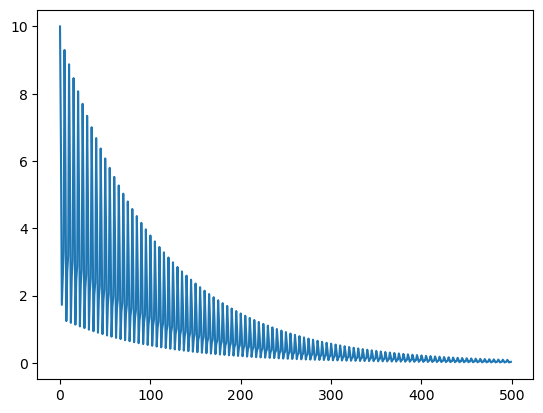

In [380]:
plt.plot(list(range(len(errors))),errors)
len(errors)

### Question 4

In [428]:
X = np.array([1, 2, 3, 4, 5])
Y = np.array([0, 0, 1, 1, 1])
losses=[]

[0, 0, 1, 1, 1]


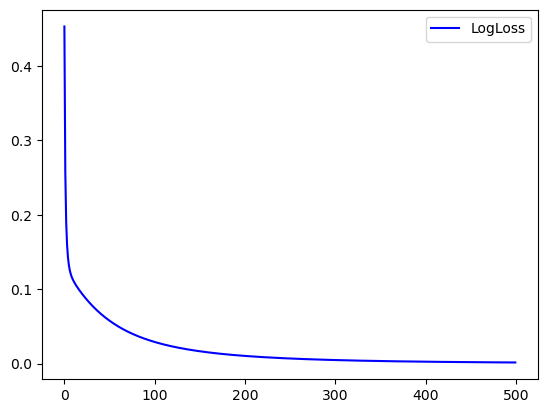

In [429]:
def logistic_regression(X,Y,epochs,alpha,b1,b0):
    for _ in range(epochs):
        for x,y in zip(X,Y):
            z=b1*x + b0
            y_pred=1/(1+np.exp(-z))
            error=y_pred-y
            b1-=(alpha*error*x)
            b0-=(alpha*error)
        losses.append(calc_loss(y_pred,y))
    
    return b1,b0

def calc_loss(y_pred,y):
    return -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

b1,b0 = logistic_regression(X,Y,500,0.05,0,0)
y_probs=[1/(1+np.exp(-(b1*x+b0))) for x in X]
y_binary = [1 if prob > 0.5 else 0 for prob in y_probs]

print(y_binary)

plt.plot(list(range(len(losses))),losses,color='blue',label='LogLoss')
plt.legend()

In [430]:
X = np.array([1, 2, 3, 4, 5])
Y = np.array([1, 1, 0, 0, 0])
losses=[]

[1, 1, 0, 0, 0]


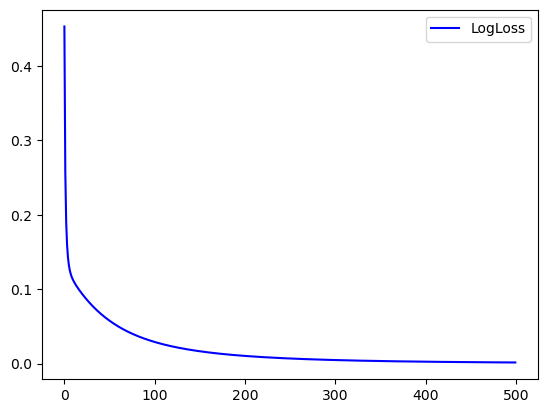

In [431]:
def logistic_regression(X,Y,epochs,alpha,b1,b0):
    for _ in range(epochs):
        for x,y in zip(X,Y):
            z=b1*x + b0
            y_pred=1/(1+np.exp(-z))
            error=y_pred-y
            b1-=(alpha*error*x)
            b0-=(alpha*error)
        losses.append(calc_loss(y_pred,y))
    
    return b1,b0

def calc_loss(y_pred,y):
    return -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

b1,b0 = logistic_regression(X,Y,500,0.05,0,0)
y_probs=[1/(1+np.exp(-(b1*x+b0))) for x in X]
y_binary = [1 if prob > 0.5 else 0 for prob in y_probs]

print(y_binary)

plt.plot(list(range(len(losses))),losses,color='blue',label='LogLoss')
plt.legend()